<a href="https://colab.research.google.com/github/KUNALKEDARI20/Data-science/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#KNN-is a Supervised machine learning algorithm used for both classification and regression
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
filename='/content/pima-indians-diabetes.data.csv'
cols=['preg','plas','pres','skin','test','mass','pedi','age','class']
dataframe=read_csv(filename,names=cols)
array=dataframe.values
X=array[:,0:8]
Y=array[:,8]

In [ ]:
dataframe

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [ ]:
Y=pd.DataFrame(Y)
Y

,0
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
763,0.0
764,0.0
765,0.0
766,1.0


In [ ]:
#Normalisation of X data
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled)
X

#OR

#X= (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#After applying  minmax scaler we got values in range of 0 to 1

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [ ]:
#KFold-is a type of model validation technique to know performance of your model on unseen data compared to train-test split data
num_folds=10
kfold=KFold(n_splits=num_folds)
model=KNeighborsClassifier(n_neighbors=17) #k=17
result=cross_val_score(model,X,Y,cv=kfold) # cv=cross validation


In [ ]:
result #The function returns an array of scores, where each score represents the accuracy of the model on a particular fold of the cross-validation.

array([0.71428571, 0.80519481, 0.66233766, 0.63636364, 0.76623377,
       0.79220779, 0.80519481, 0.85714286, 0.77631579, 0.75      ])

In [ ]:
print(result.mean()*100)

75.65276828434723


WHAT IS OPTIMUM NUMBER OF K SHOULD BE..

To know the number of k grid search algorithm is used

**Grid Search Algorithm for Hyperparameter Tunning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
filename='/content/pima-indians-diabetes.data.csv'
cols=['preg','plas','pres','skin','test','mass','pedi','age','class']
dataframe=read_csv(filename,names=cols)
array=dataframe.values
X=array[:,0:8]
Y=array[:,8]

In [ ]:
#n_neighbors=np.array(range(1,40)) #k=1 to 39 all numbers  even and odd will be considered
n_neighbors=np.array([2*i+1 for i in range(1,20)]) # now here only odd numbers will be considered for n_neighbors
param_grid=dict(n_neighbors=n_neighbors)

param_grid

{'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
        37, 39])}

In [ ]:
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

In [ ]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.7552584670231729
{'n_neighbors': 13}


In [ ]:
#Visulization of CV results
#range of k we want to try
k_range=range(1,41)
k_scores=[]
# we will loop through reasonable values of k
for k in k_range:
  #2.run neighbors classifier with k neighbors
  knn=KNeighborsClassifier(n_neighbors=k) # k=1 to 40
  #3.Obtain cross_val_score for  KNeighbors classifier with k neighbors
  scores=cross_val_score(knn,X,Y,cv=kfold,scoring='accuracy')
  # 4.append mean of scores in k_scores list
  k_scores.append(scores.mean()*100)

#k_scores=grid.best_score_
pd.Series(k_scores).sort_values(ascending=False) # ascending=False>>>>descending order(big to small)

17    76.042379
15    76.035543
20    75.921053
19    75.914217
16    75.652768
13    75.647642
21    75.529733
11    75.251196
22    75.138414
18    75.133288
34    75.001709
9     74.865003
24    74.743677
14    74.736842
35    74.610390
12    74.605263
32    74.483937
6     74.480519
7     74.478811
23    74.355776
26    74.352358
30    74.350649
33    74.350649
36    74.350649
38    74.096036
25    74.092618
10    74.084074
8     73.961039
39    73.834586
27    73.699590
5     73.696172
29    73.574846
28    73.569720
37    73.443267
31    73.311688
4     72.655502
3     72.127478
1     71.476418
2     70.560492
0     67.705058
dtype: float64

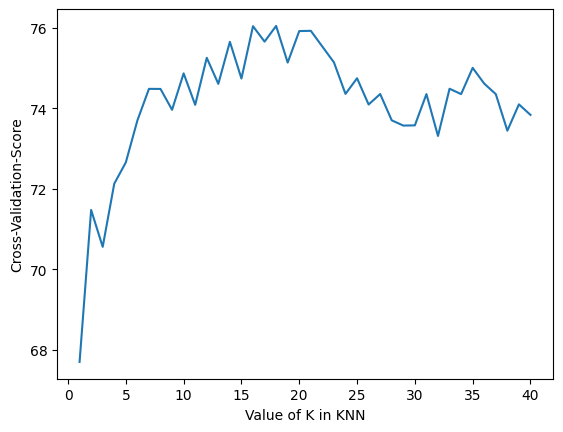

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range,k_scores)
plt.xlabel('Value of K in KNN')
plt.ylabel('Cross-Validation-Score')
plt.show()


